This relates to the Project 2 part e) 'Write your own Logistic Regression code'

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import gradient_descent_ols_and_ridge as gd

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_logistic_cost(X, y, beta):
    """
    Compute the binary cross-entropy cost for logistic regression.

    Parameters:
    X : numpy array of shape (m, n), the design matrix
    y : numpy array of shape (m,), true labels (0 or 1)
    beta : numpy array of shape (n,), the model weights including intercept
    
    Returns:
    cost : scalar value of the cost
    """
    m = X.shape[0]
    h = sigmoid(np.dot(X, beta))  # Predictions using sigmoid
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))  # Binary cross-entropy loss, log likelihood/ loss? is that the same?
    return cost

def logistic_gradient(batch_size, Xi, yi, beta, lmbda=0.001):
    """
    Calculate the gradient for logistic regression with L2 regularization.
    
    Parameters:
    batch_size : int, number of samples in the batch
    Xi : numpy array of shape (batch_size, n), the batch of input data
    yi : numpy array of shape (batch_size,), true labels for the batch
    beta : numpy array of shape (n,), current model weights
    lmbda : float, regularization strength (default: 0.001)
    
    Returns:
    gradient : numpy array of shape (n,), the gradient with respect to beta
    """
    # Predictions with sigmoid
    probabilities = sigmoid(np.dot(Xi, beta))
    
    # Compute the gradient
    gradient = (1 / batch_size) * np.dot(Xi.T, (probabilities - yi))
    
    # Add L2 regularization (do not regularize the intercept term)
    gradient[1:] += (lmbda / batch_size) * beta[1:]
    
    return gradient

def predict(X, beta):
    """
    Generate class predictions (0 or 1) for logistic regression.
    
    Parameters:
    X : numpy array of shape (m, n), the design matrix
    beta : numpy array of shape (n,), the model weights including intercept
    
    Returns:
    predictions : numpy array of shape (m,), predicted class labels (0 or 1)
    """
    # Compute the probability estimates
    probabilities = sigmoid(np.dot(X, beta))
    
    # Convert probabilities to class labels (0 or 1) based on threshold 0.5
    predictions = (probabilities >= 0.5).astype(int)
    return predictions

def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.
    
    Parameters:
    y_true : numpy array of shape (m,), true labels
    y_pred : numpy array of shape (m,), predicted labels
    
    Returns:
    accuracy : float, the accuracy of predictions
    """
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

# Generate the dataset
np.random.seed(666)  # For reproducibility
n_samples, n_features = 100, 2
X = np.random.rand(n_samples, n_features)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple binary classification problem

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(n_samples), X]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Initialize model parameters
initial_beta = np.zeros(X_train.shape[1])

# Gradient Descent Parameters
learning_rate = 0.3594
n_iterations = 1000  # Number of epochs
batch_size = 1
lmbda = 0.01

# Train the logistic regression model using our own SGD function
beta_gd = gd.stochastic_gradient_descent(
    X_train, y_train, initial_beta,
    learning_rate=learning_rate,
    n_iterations=n_iterations,
    model=logistic_gradient,  # Use the logistic gradient function
    batch_size=batch_size,
    lmbda=lmbda
)

# Generate predictions for the test data
y_pred_test = predict(X_test, beta_gd)

# Calculate and print the accuracy on the test set
test_accuracy = calculate_accuracy(y_test, y_pred_test)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# Calculate and print the accuracy on the training set as well
y_pred_train = predict(X_train, beta_gd)
train_accuracy = calculate_accuracy(y_train, y_pred_train)
print(f"Accuracy on the training set: {train_accuracy * 100:.2f}%")

Accuracy on the test set: 95.00%
Accuracy on the training set: 100.00%


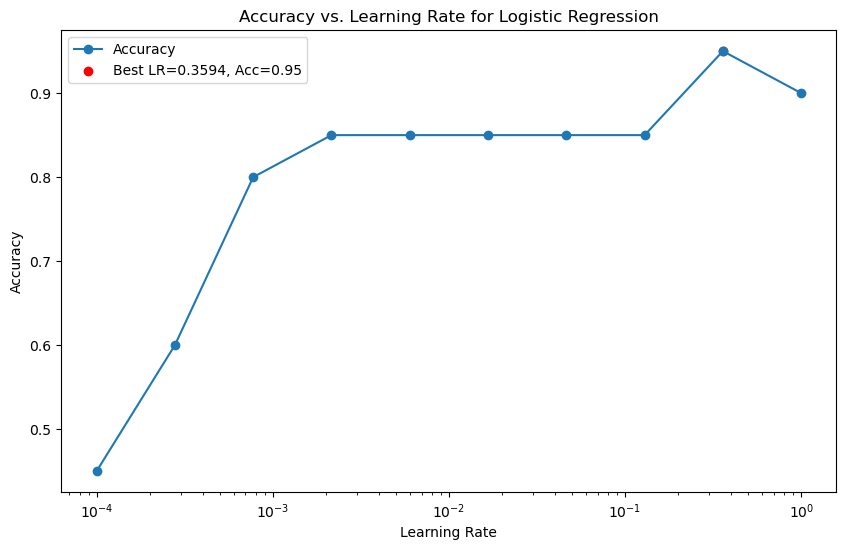

In [12]:
### Accuracy vs Learning rate ###

# Define a range of learning rates to test
learning_rates = np.logspace(-4, 0, 10)  # from 0.0001 to 1
n_iterations = 1000  # Number of epochs
accuracies = []

best_accuracy = 0
best_learning_rate = 0

# Loop through learning rates, train the model, and calculate accuracy
for lr in learning_rates:
    initial_beta = np.zeros(X_train.shape[1])
    beta_gd = gd.stochastic_gradient_descent(
        X_train, y_train, initial_beta,
        learning_rate=lr,
        n_iterations=n_iterations,
        model=logistic_gradient,
        batch_size=batch_size,
        lmbda=lmbda
    )
    y_pred_test = predict(X_test, beta_gd)
    accuracy = calculate_accuracy(y_test, y_pred_test)
    accuracies.append(accuracy)

    # Update the best accuracy and learning rate if this is the highest so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = lr

# Plot accuracy against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o', label='Accuracy')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate for Logistic Regression')

# Mark the best accuracy point on the plot
plt.scatter([best_learning_rate], [best_accuracy], color='red', label=f'Best LR={best_learning_rate:.4f}, Acc={best_accuracy:.2f}')
plt.legend()
plt.show()


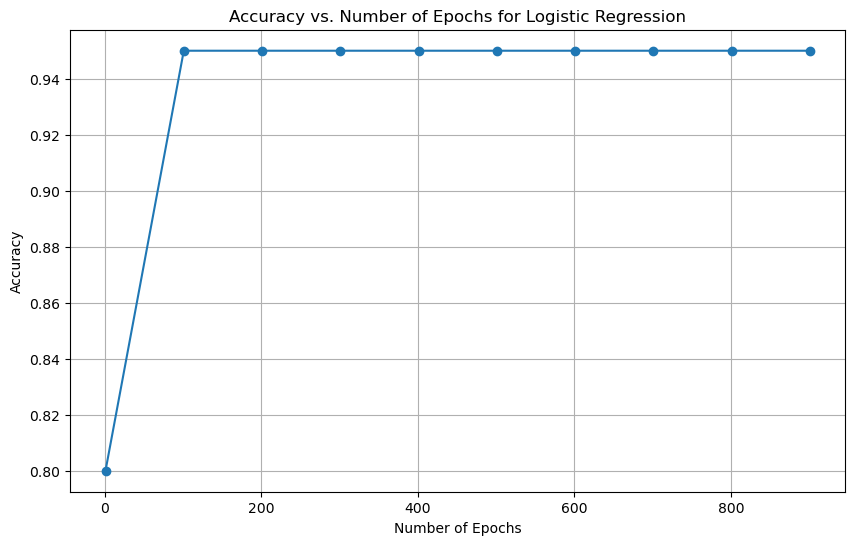

In [13]:
### Accuracy vs Number of epochs ###

# Define a range of epochs to test (e.g., from 1 to 1000)
n_epochs = np.arange(1, 1001, 100)  # Increment by 10 for smoother plot
accuracies = []

# Loop through epochs, train the model, and calculate accuracy
for epochs in n_epochs:
    # Reinitialize beta for each run
    initial_beta = np.zeros(X_train.shape[1])
    
    # Train the model with the specified number of epochs
    beta_gd = gd.stochastic_gradient_descent(
        X_train, y_train, initial_beta,
        learning_rate=learning_rate,
        n_iterations=epochs,  # Epochs here controls the full dataset passes
        model=logistic_gradient,
        batch_size=batch_size,
        lmbda=lmbda
    )
    
    # Predict on the test set and calculate accuracy
    y_pred = predict(X_test, beta_gd)
    accuracy = calculate_accuracy(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy against number of epochs
plt.figure(figsize=(10, 6))
plt.plot(n_epochs, accuracies, marker='o')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs for Logistic Regression')
plt.grid(True)
plt.show()


In [15]:
### Scikit-Learn Logistic regression ###

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate the dataset
np.random.seed(666)  # For reproducibility
n_samples, n_features = 100, 2
X = np.random.rand(n_samples, n_features)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary classification problem

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Scikit-Learn logistic regression model
scikit_log_reg = LogisticRegression(penalty='l2', C=1/lmbda, solver='lbfgs', max_iter=1000)
scikit_log_reg.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_scikit_test = scikit_log_reg.predict(X_test)

# Calculate accuracy on the test set
accuracy_scikit_test = accuracy_score(y_test, y_pred_scikit_test)

# Print results
print(f"Scikit-Learn Logistic Regression coefficients: {scikit_log_reg.coef_}")
print(f"Scikit-Learn Logistic Regression intercept: {scikit_log_reg.intercept_}")
print(f"Scikit-Learn Logistic Regression test accuracy: {accuracy_scikit_test * 100:.2f}%")


Scikit-Learn Logistic Regression coefficients: [[16.66781577 17.49898807]]
Scikit-Learn Logistic Regression intercept: [-17.32919222]
Scikit-Learn Logistic Regression test accuracy: 100.00%


Note: Scikit-Learn logistic regression does NOT have a Learning rate. The model is improved differently.

Test accuracy on the Wisconsin Breast Cancer dataset: 97.37%


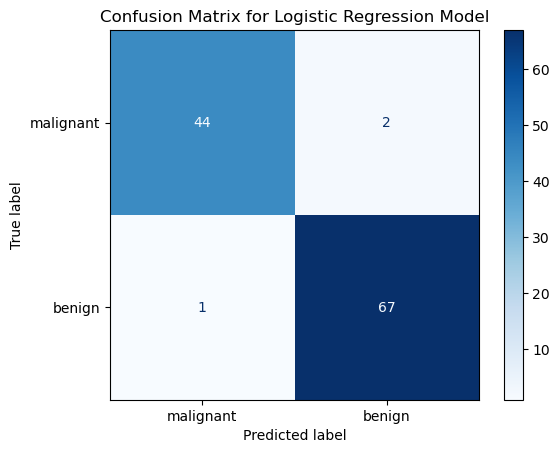

In [16]:
### Wiscinson Breast Cancer Data set with own logistic regression code ###

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0 = malignant, 1 = benign)

# Standardize the feature set (recommended for gradient-based algorithms)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term (a column of ones) to X
X = np.c_[np.ones(X.shape[0]), X]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Initialize model parameters
initial_beta = np.zeros(X_train.shape[1])
learning_rate = 0.01
n_iterations = 1000
batch_size = 1
lmbda = 0.01  # Regularization parameter

# Train the logistic regression model using your custom SGD function
beta_gd = gd.stochastic_gradient_descent(
    X_train, y_train, initial_beta,
    learning_rate=learning_rate,
    n_iterations=n_iterations,
    model=logistic_gradient,  # Ensure logistic_gradient is defined
    batch_size=batch_size,
    lmbda=lmbda
)

# Predict and evaluate accuracy on the test set
y_pred_test = predict(X_test, beta_gd)
test_accuracy = calculate_accuracy(y_test, y_pred_test)

print(f"Test accuracy on the Wisconsin Breast Cancer dataset: {test_accuracy * 100:.2f}%")

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()
